In [ ]:
!pip install git+https://github.com/KrishnaswamyLab/CATCH
!pip install astroML
!pip install --pre astroquery[all]

  Cloning https://github.com/KrishnaswamyLab/CATCH to /tmp/pip-req-build-bd4ym74j
  Running command git clone -q https://github.com/KrishnaswamyLab/CATCH /tmp/pip-req-build-bd4ym74j
     |████████████████████████████████| 45 kB 1.8 MB/s 
     |████████████████████████████████| 1.8 MB 5.9 MB/s 
     |████████████████████████████████| 104 kB 39.0 MB/s 
     |████████████████████████████████| 416 kB 37.4 MB/s 
  Created wheel for CATCH: filename=CATCH-0.0-py3-none-any.whl size=8149 sha256=a607122f4e5a49e667ed9dd0c921d0c0849f172f4777157c0f3913a82ae00223
  Stored in directory: /tmp/pip-ephem-wheel-cache-bxwhmahn/wheels/e3/be/aa/e5f40f718c452b06cb7114e5f41976eed500387cb12f73a32c
Successfully built CATCH
     |████████████████████████████████| 134 kB 4.2 MB/s 
     |████████████████████████████████| 5.0 MB 4.3 MB/s 
     |████████████████████████████████| 832 kB 50.6 MB/s 
     |████████████████████████████████| 132 kB 49.9 MB/s 
     |████████████████████████████████| 744 kB 46.2 MB/s 
     

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# fetch the RR Lyrae and non-variable star dataset
import sys
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.metrics import roc_curve

from astroML.utils import split_samples, completeness_contamination
from astroML.datasets import fetch_rrlyrae_combined

sys.path.append('/content/drive/MyDrive/Colab Notebooks/Phys 678 Final Project')
from astro_dc_utils import *

#----------------------------------------------------------------------
# fetches the magnitude data from SDSS
# See documentation at https://www.astroml.org/modules/generated/astroML.datasets.fetch_rrlyrae_combined.html
# for a description of the returned values
# u-g, g-r, r-i, i-z
X, y = fetch_rrlyrae_combined()

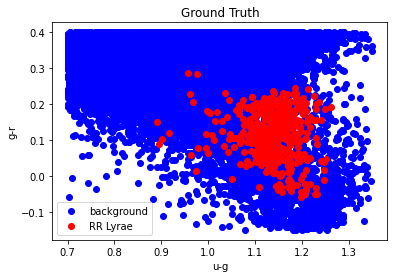

In [34]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], color='blue', label='background')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], color='red', label='RR Lyrae')

plt.xlabel('u-g')
plt.ylabel('g-r')
plt.title("Ground Truth")

plt.legend()
plt.show()

In [35]:
N = 5000
number_of_rows = X.shape[0]
random_indices = np.random.choice(number_of_rows, size=5000, replace=False)

y = y[random_indices]
X = X[random_indices, :]

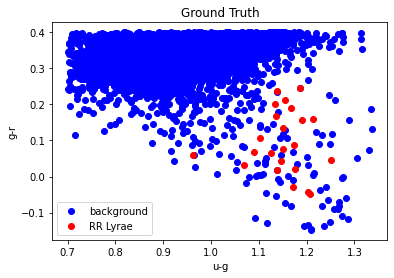

In [36]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], color='blue', label='background')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], color='red', label='RR Lyrae')

plt.xlabel('u-g')
plt.ylabel('g-r')
plt.title("Ground Truth")

plt.legend()
plt.show()

In [37]:
df = pd.DataFrame(data = X, columns = ['u-g', 'g-r', 'r-i', 'i-z'])
print(df)

           u-g       g-r       r-i       i-z
0     0.802999  0.389999  0.115000  0.022001
1     0.837000  0.370001  0.195999  0.026001
2     1.039999  0.393002  0.150999  0.142000
3     1.080999  0.351999  0.122001  0.021999
4     0.806999  0.287001  0.118000  0.130999
...        ...       ...       ...       ...
4995  0.811001  0.332001  0.119999  0.156000
4996  0.870001  0.390999  0.132000  0.074001
4997  0.863001  0.309999  0.091000  0.212000
4998  1.106000  0.389001  0.118999  0.018000
4999  0.930000  0.334000  0.108999  0.039000

[5000 rows x 4 columns]


In [38]:
catch_op = catch.CATCH(knn=10, random_state=18, n_pca=4, n_jobs=1)
catch_op.fit(df)

Calculating PCA...
Calculating Diffusion Condensation...
  Calculating Condensation Parameters...
  Calculated Condensation Parameters in 0.52 seconds.
Calculated Diffusion Condensation in 207.84 seconds.


Calculating Topological Activity...
Calculated Topological Activity in 0.01 seconds.
[-92 -77 -61 -56 -45 -42 -27]


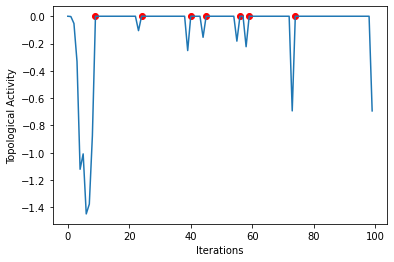

In [39]:
 visualize_topology(catch_op, topological_activity=True, trees=False)

Calculating Topological Activity...
Calculated Topological Activity in 0.02 seconds.


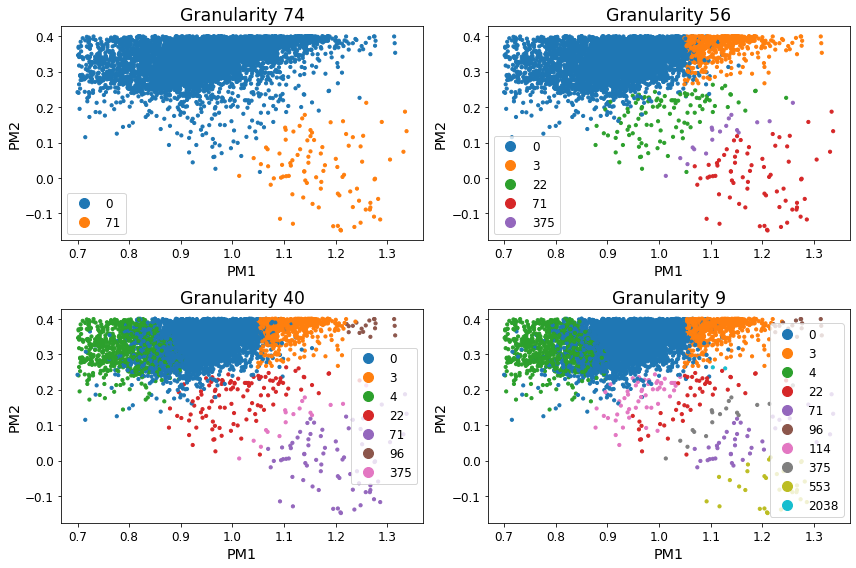

In [47]:
def granulated_feature_plot(X, catch_op, features=['pmra', 'pmdec'], real_idxs=None):
  ''' Creates a 2-d scatter plot of features [x, y] colored according to 4 different granularities
  '''
  levels = catch_op.transform()
  fig, axes = plt.subplots(2,2, figsize=(12, 8))

  for i, ax in enumerate(axes.flatten()):    
      scprep.plot.scatter2d(X, c=catch_op.NxTs[levels[-2*i-1]], ax=ax,
                            title='Granularity '+str(len(catch_op.NxTs)+levels[-2*i-1]),
                            xticks=True, yticks=True, label_prefix="PM", fontsize=10, s=10)
      

  # xs = np.array([list(df[features[0]])[i] for i in real_idxs])
  # ys = np.array([list(df[features[1]])[i] for i in real_idxs])
  # special_pts = np.column_stack((xs, ys))
  # scprep.plot.scatter2d(special_pts, c='black', ax=ax, s=10)

  fig.tight_layout()

granulated_feature_plot(df, catch_op, features=['u-g', 'g-r'])

In [45]:
y

array([0., 0., 0., ..., 0., 0., 0.])